In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline
plt.style.use('seaborn-pastel')

In [17]:
#### kernel
def my_kernel(x_n,x_m,a_1=200.0,a_2=0.1,a_3=1.0,a_4=10.0):
    return a_1*np.exp(-a_2*0.5*np.dot(x_n-x_m,x_n-x_m))

### Gaussian process
def pred(_x,_y,newpoint):
    ### gram matrix
    aaa=np.array([my_kernel(i,j) for i in _x for j in _x])
    K = aaa.reshape([np.shape(_x)[0],np.shape(_x)[0]])
    aux = np.array([my_kernel(i,newpoint) for i in _x])
    mu = np.dot(aux,np.dot(np.linalg.inv(K),_y))
    vari = my_kernel(newpoint,newpoint)-np.dot(aux,np.dot(np.linalg.inv(K+np.identity(len(_x))),aux))
    return (mu,vari)

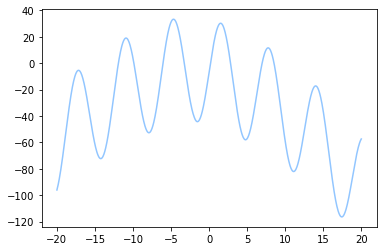

In [18]:
def generate_sample(x):
    return 40.0*np.sin(x/1.0)-np.power(0.3*(x+6.0),2)-np.power(0.2*(x-4.0),2)-1.0*np.abs(x+2.0)+np.random.normal(0,1,1)

x_ziku = np.linspace(-20,20,1000)
z_ziku = generate_sample(x_ziku)
plt.plot(x_ziku, z_ziku) #### plot true data
plt.show()

def maximum(x):
    return max(range(np.shape(x)[0]), key=lambda i:x[i])

#### EI
def aqui1(mean,vari,qqq):
    lamb = (mean - qqq)/(vari*1.0)
    z = np.array([(mean[i] - qqq)*norm.cdf(lamb[i]) + vari[i]*norm.pdf(lamb[i]) for i in range(len(lamb))])
    return z

#### PI
def aqui2(mean,vari,qqq):
    lamb = (mean - qqq-0.01)/(vari*1.0)
    z = np.array([norm.cdf(lamb[i]) for  i in range(len(lamb))])
    return z
#### UCB
def aqui3(mean,vari,qqq):
    return mean+1.0*vari

x_point1.9897862033135674
x_point[9.38535631]
x_point[-5.28340611]
x_point[-12.70758954]
x_point[19.99030984]
x_point[-19.97688589]
x_point[14.5659329]
x_point[-1.64974539]
x_point[-8.7014017]
x_point[5.3074559]
x_point[-16.00481825]
x_point[-5.75069322]
x_point[-4.30075124]
x_point[-4.66348354]
x_point[11.67867935]


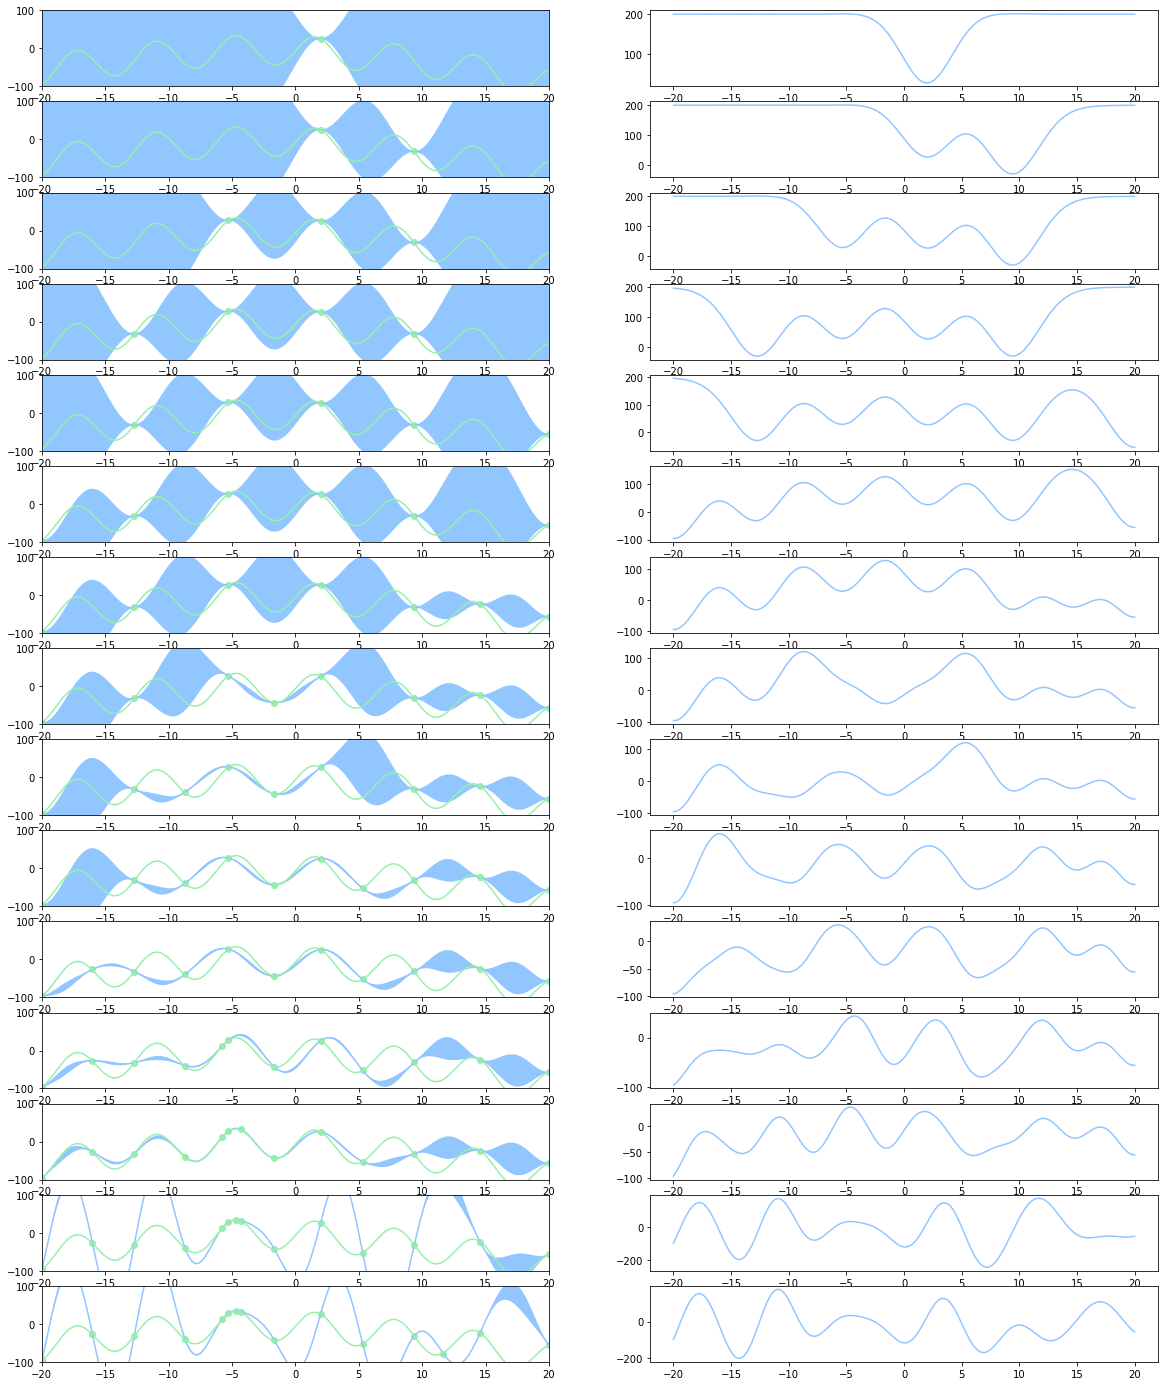

finish


array([-20.91250118])

In [19]:
x_array = np.array([])
y_array = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_array:
        x_array = np.append(x_array,x_point)
        print("x_point"+str(x_point))
        y_point = generate_sample(x_point)
        y_array = np.append(y_array,y_point)
        #y_array = np.unique(y_array)
    mean_point = np.array([ pred(x_array,y_array,j)[0] for j in x_ziku])
    variance_point = np.array([ pred(x_array,y_array,j)[1] for j in x_ziku]) 
    qqq = max(y_array)
    accui = aqui3(mean_point,variance_point,qqq) ###change this function
    x_point = x_ziku[maximum(accui)]+np.random.normal(0,0.01,1)
    if(i%1==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x_ziku,np.array(mean_point),label="mean")
        plt.plot(x_ziku,z_ziku)
        high_bound = mean_point+ 1.0*variance_point
        lower_bound = mean_point- 1.0*variance_point
        plt.fill_between(x_ziku,high_bound,lower_bound,label="confidence")
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_array,y_array)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x_ziku,accui)
        plt.savefig("bayes_UCB.png")### change the name
plt.show()
print("finish")
x_point-10

x_point9.186971453544274
x_point[-20.00473054]
x_point[-4.91861865]
x_point[20.00476138]
x_point[1.42884325]
x_point[-11.27357138]
x_point[14.43226888]
x_point[5.03580812]
x_point[-15.11957339]
x_point[-1.754573]
x_point[-7.89835269]
x_point[11.74496091]
x_point[16.92068845]
x_point[-12.46221954]
x_point[-4.50241072]
finish


array([-14.66668694])

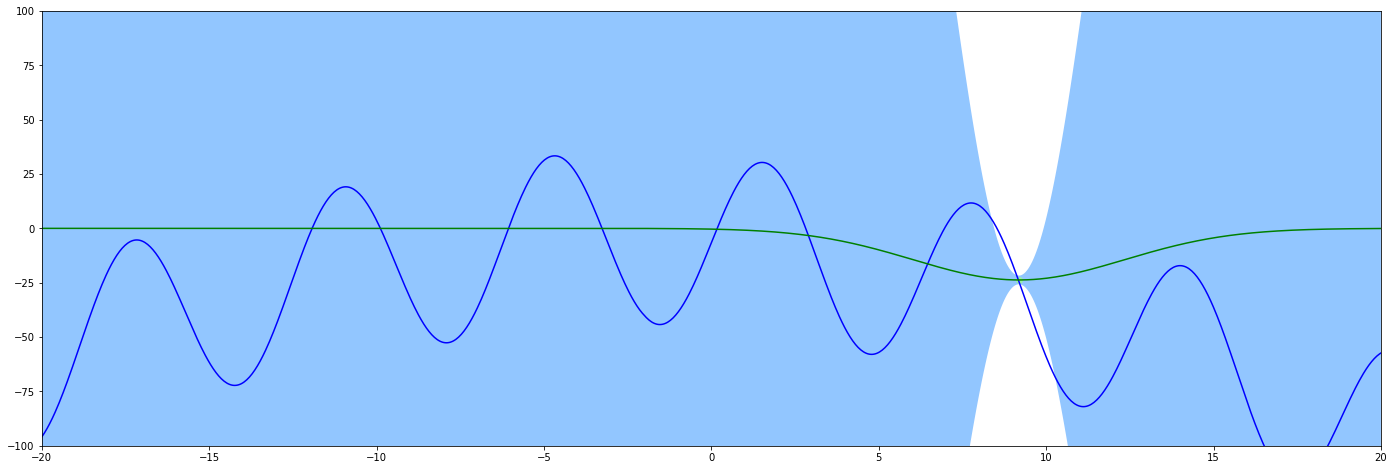

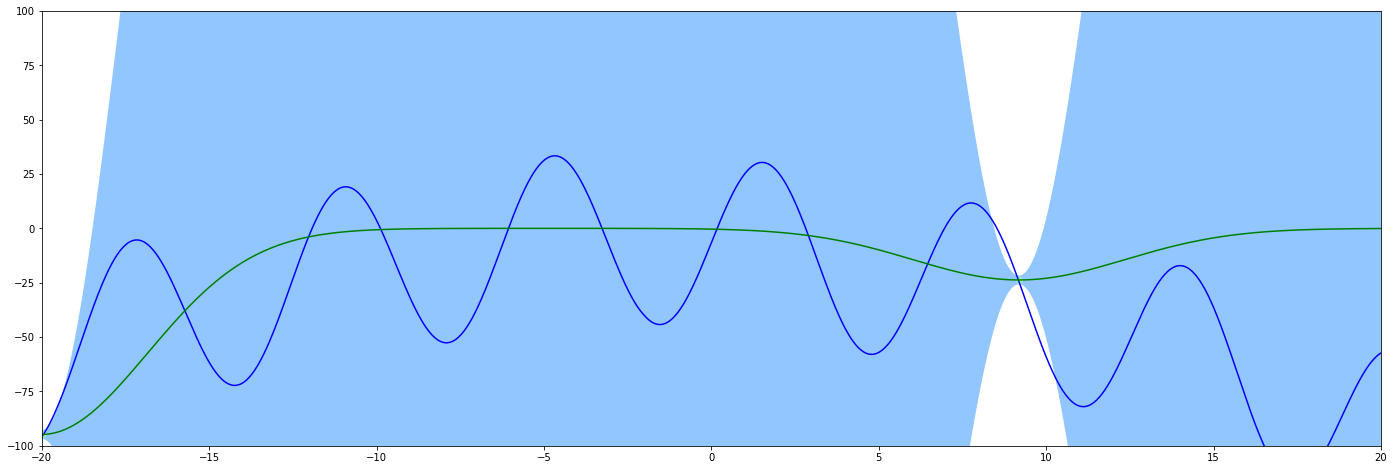

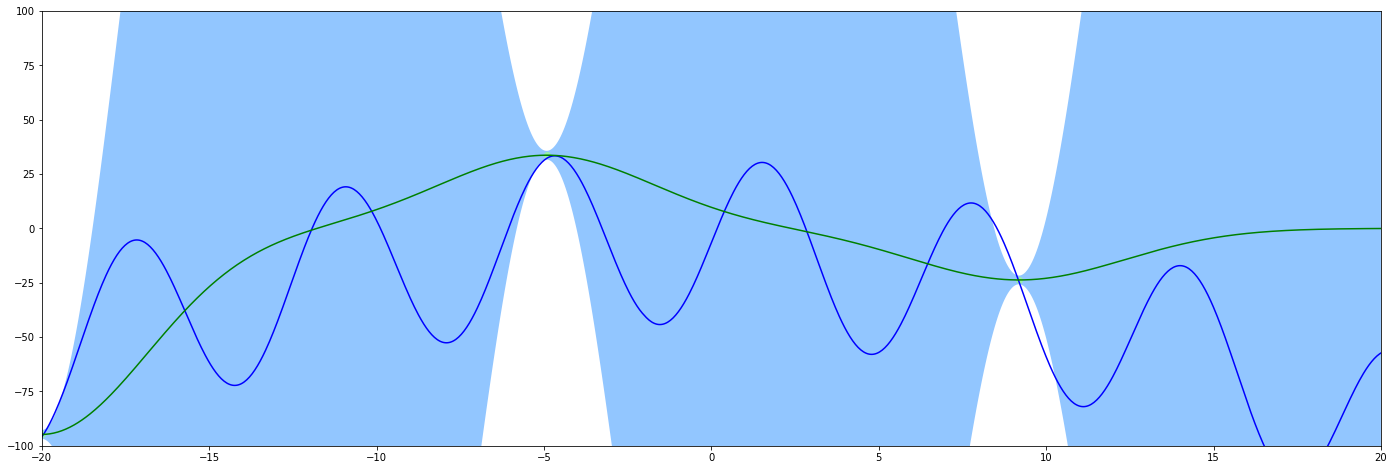

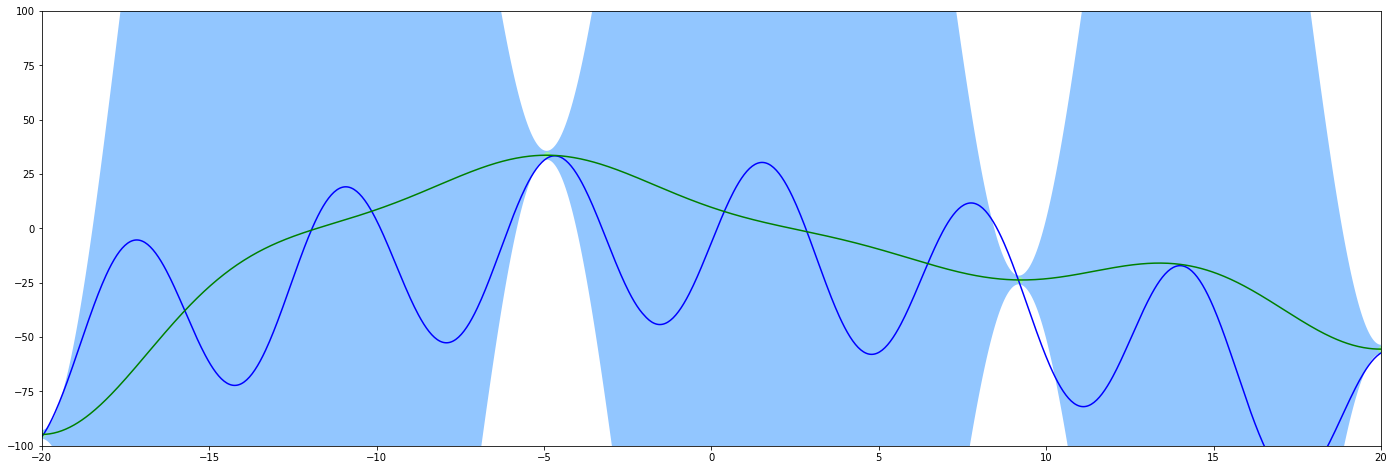

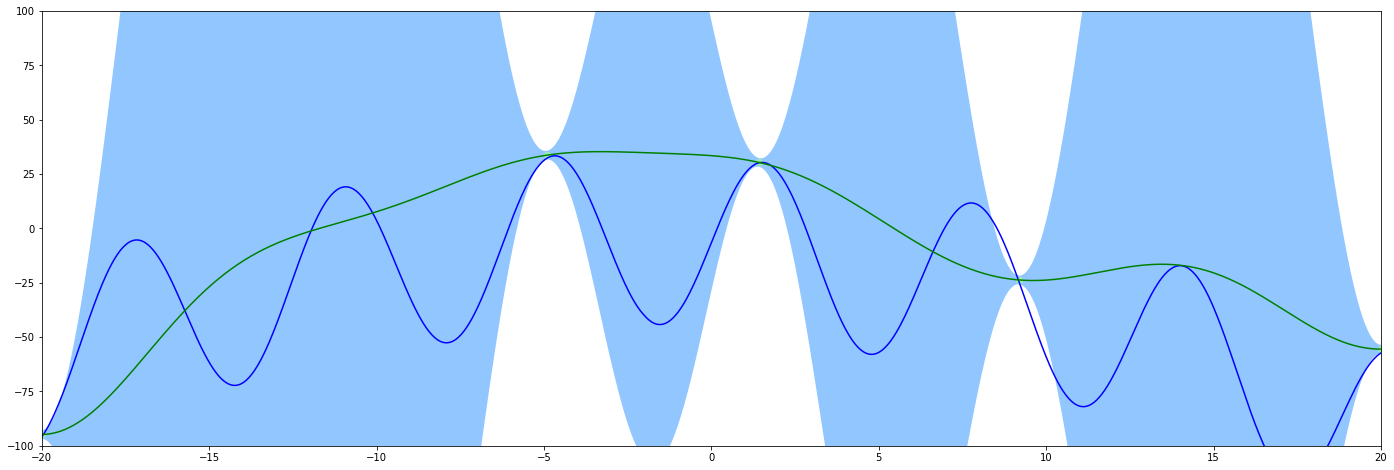

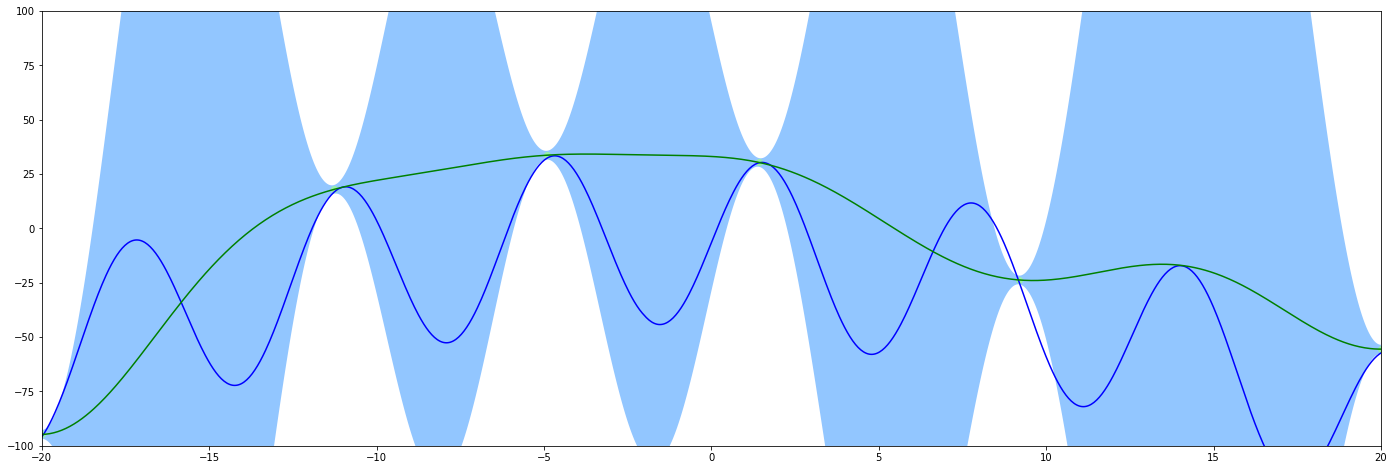

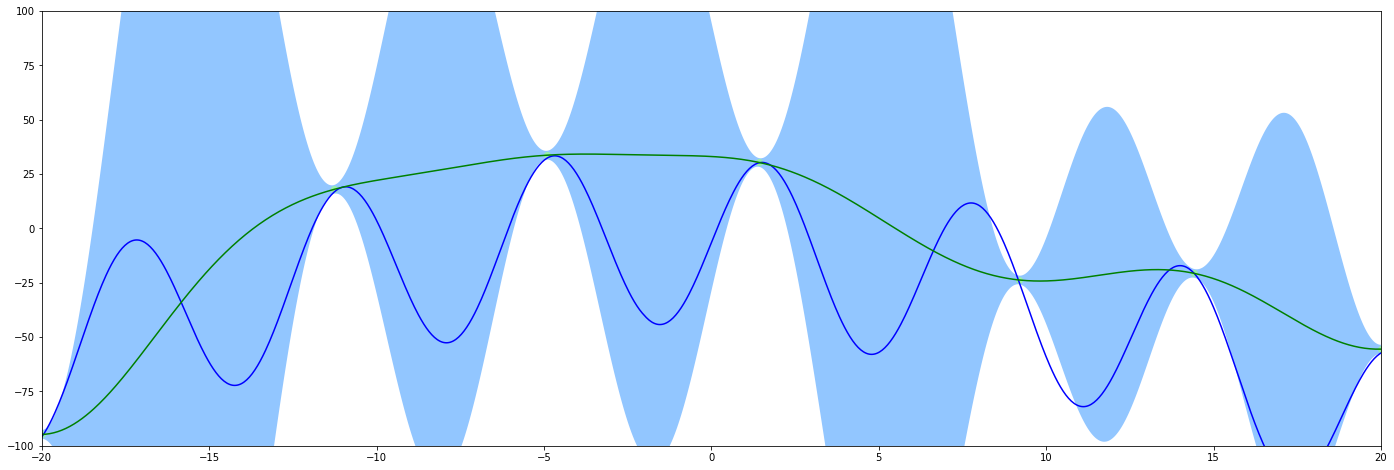

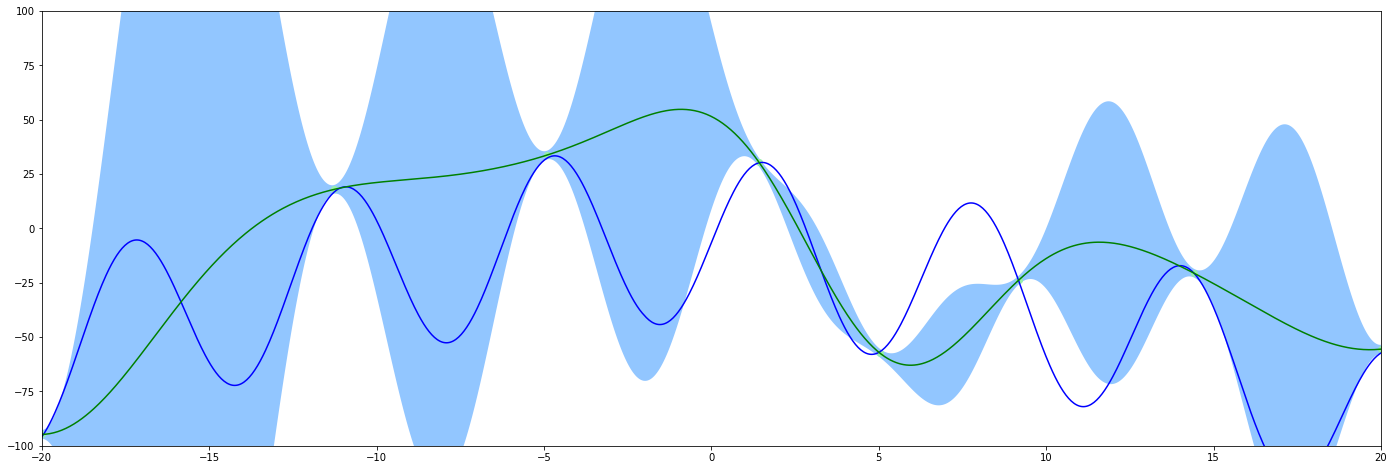

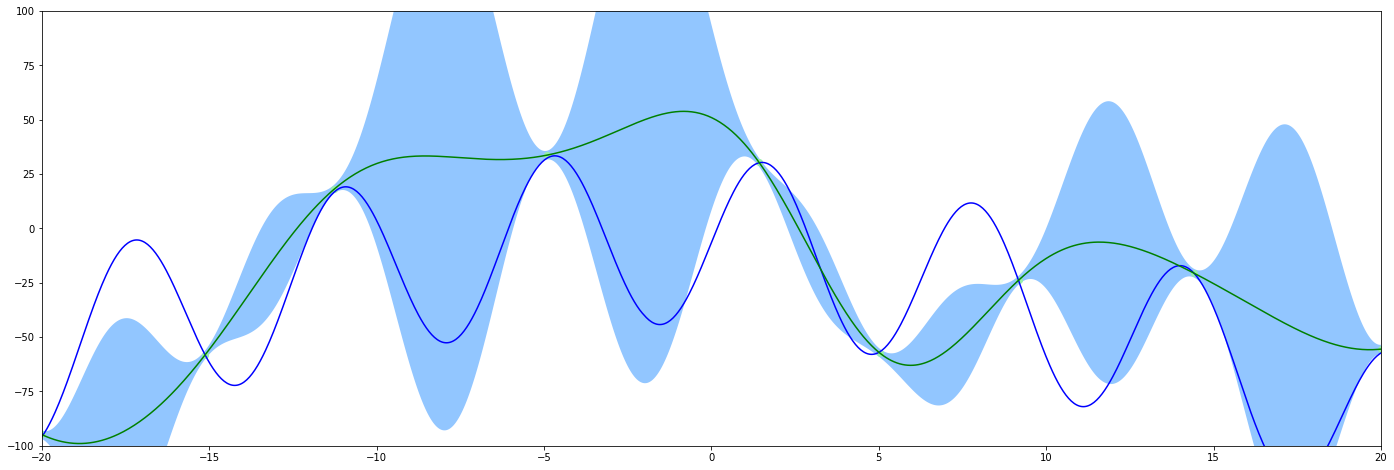

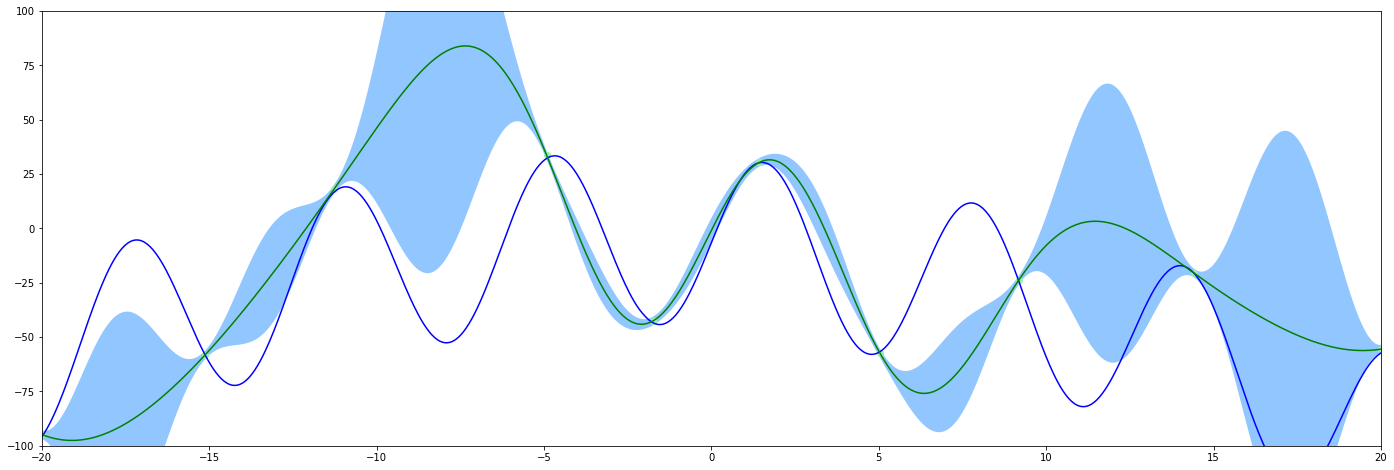

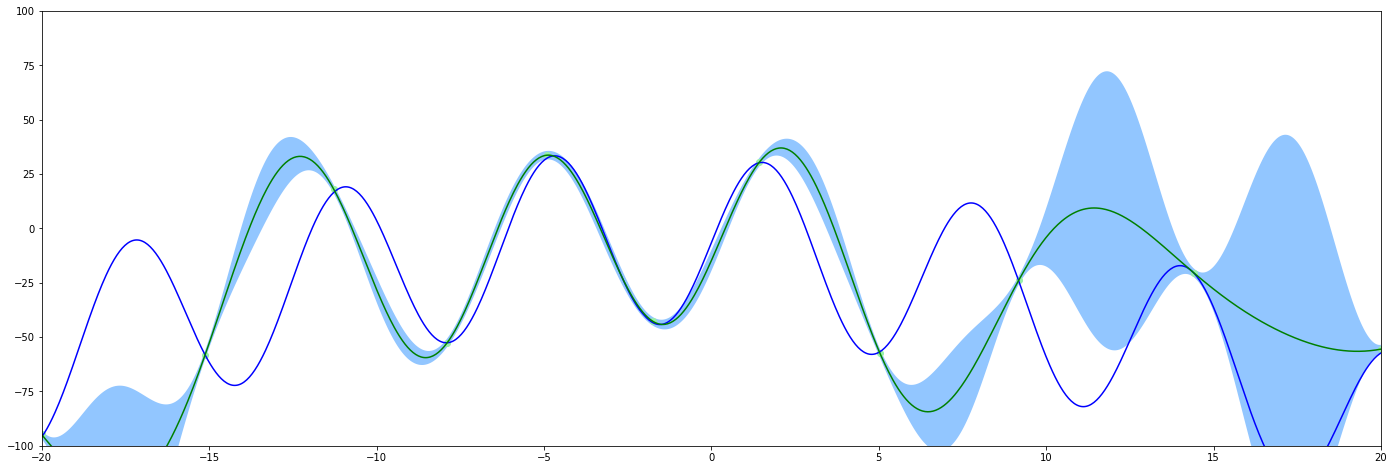

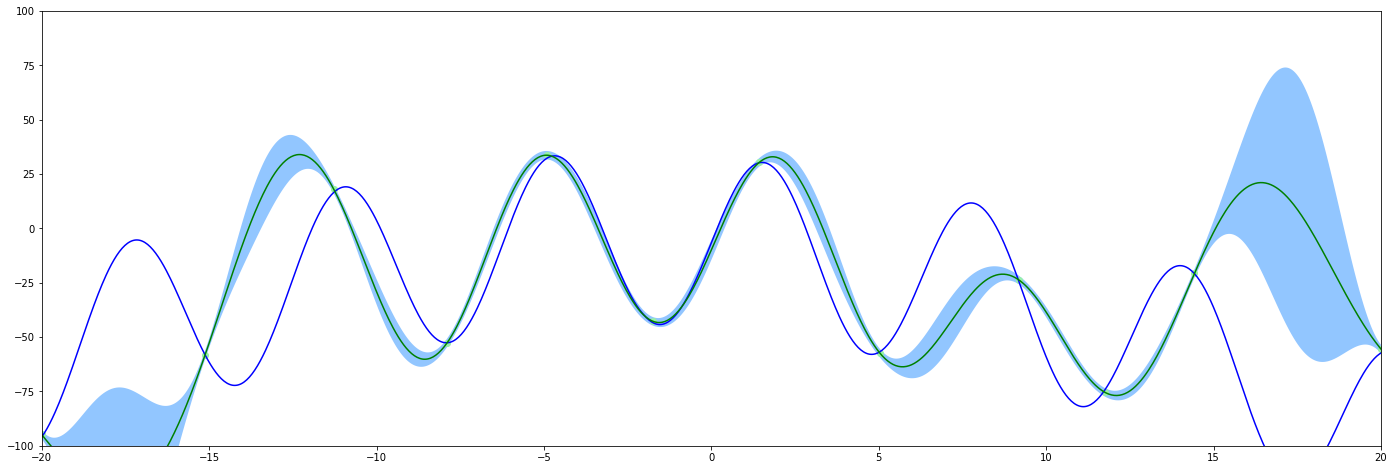

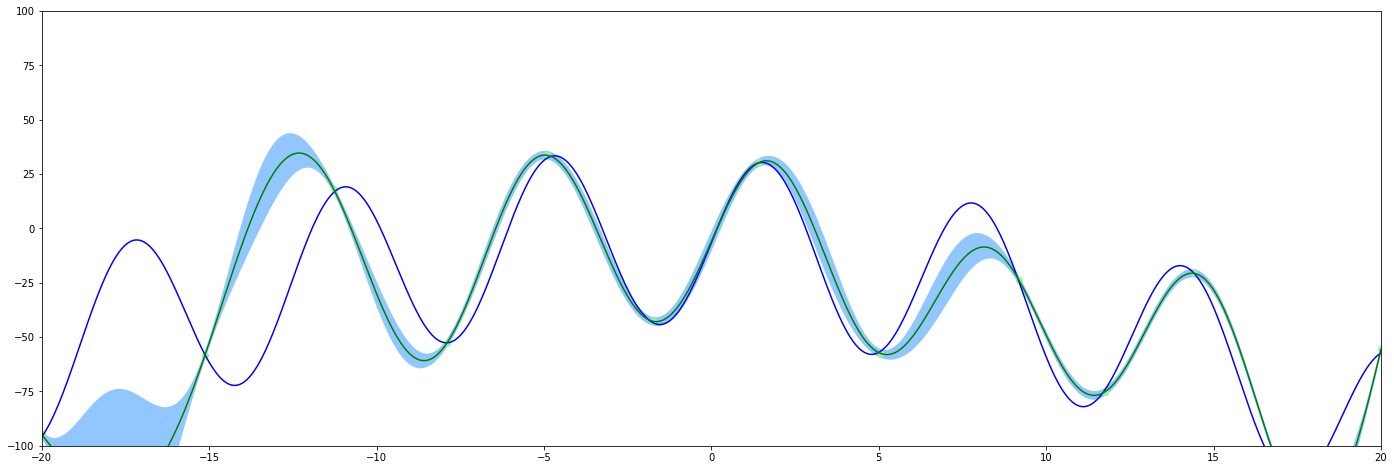

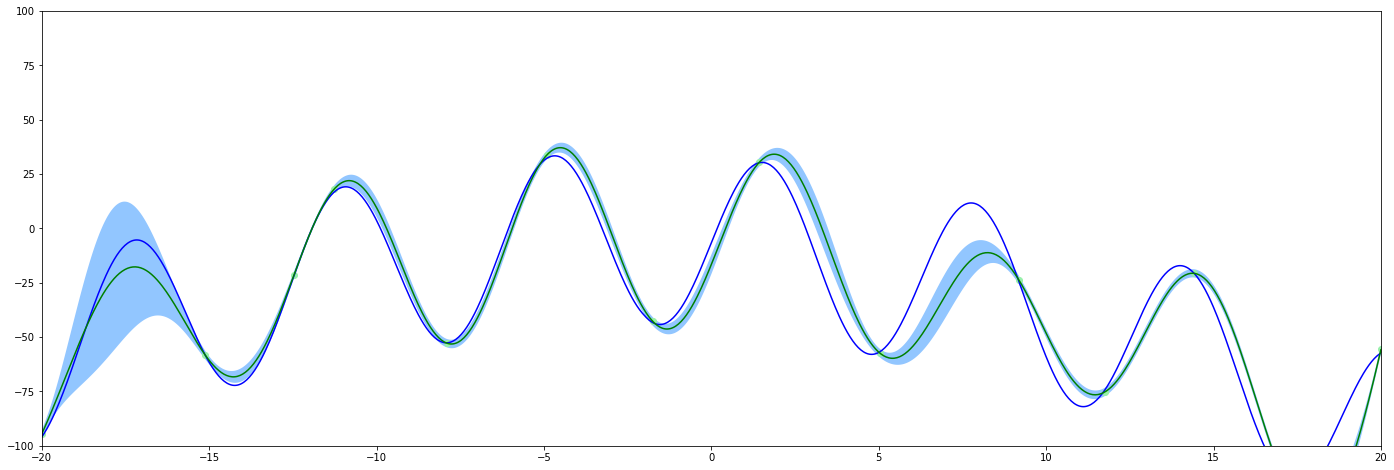

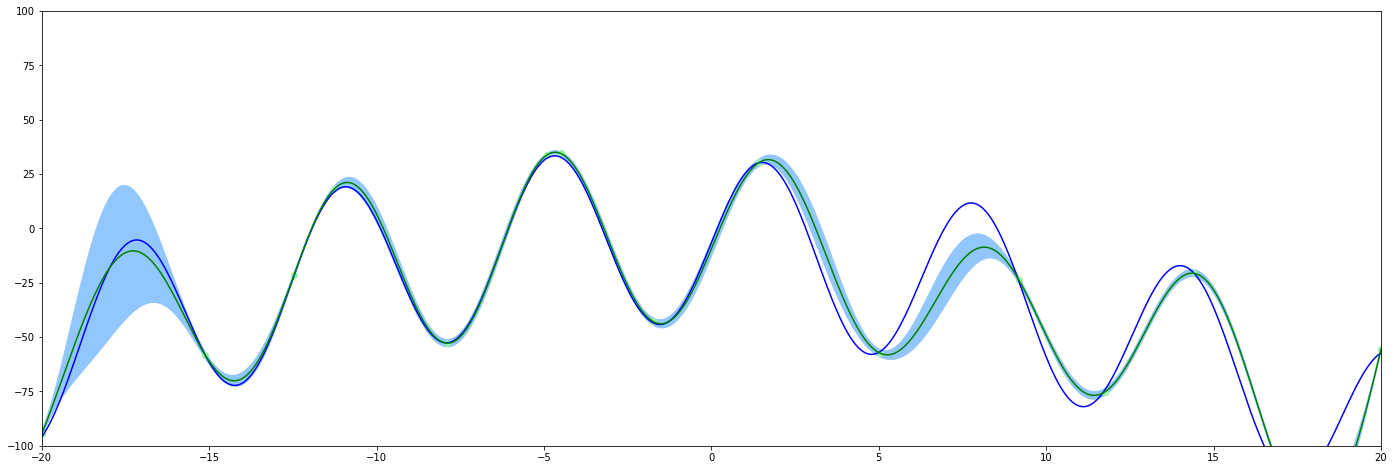

In [22]:
import matplotlib.animation as animation

x_array = np.array([])
y_array = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
ims = []
for i in range(epoch):
    if x_point not in x_array:
        x_array = np.append(x_array,x_point)
        print("x_point"+str(x_point))
        y_point = generate_sample(x_point)
        y_array = np.append(y_array,y_point)
        #y_array = np.unique(y_array)
    mean_point = np.array([ pred(x_array,y_array,j)[0] for j in x_ziku])
    variance_point = np.array([ pred(x_array,y_array,j)[1] for j in x_ziku]) 
    qqq = max(y_array)
    accui = aqui3(mean_point,variance_point,qqq) ###change this function
    x_point = x_ziku[maximum(accui)]+np.random.normal(0,0.01,1)
    if(i%1==0):
        fig = plt.figure(figsize=(24, 8))
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlim(-20,20)
        ax.set_ylim(-100,100)
        high_bound = mean_point+ 2.0*variance_point
        lower_bound = mean_point- 2.0*variance_point
        ax.fill_between(x_ziku,high_bound,lower_bound, label="confidence")
        ax.plot(x_ziku,z_ziku, color='blue')
        ax.plot(x_ziku,np.array(mean_point),color='green', label="mean")
        ax.scatter(x_array,y_array)
        # ax.plot(x_ziku,accui)
        fig.savefig(f'fig{i}.png')

print("finish")
x_point-10

In [23]:
from PIL import Image

#画像を入れる箱を準備
pictures=[]
#画像を箱に入れていく
for i in range(15):
    pic_name='fig' +str(i)+ '.png'
    img = Image.open(pic_name)
    pictures.append(img)
#gifアニメを出力する
pictures[0].save('anime.gif',save_all=True, append_images=pictures[1:],
optimize=False, duration=500, loop=0)